In [1]:
from datautils import readLangData
from langclass import Lang
from encoderrnn import EncoderRNN
from decoderrnn import DecoderRNN
from decoderrnnattn import AttnDecoderRNN
from trainutils import trainIters
from evaluateutils import evaluateRandomly
from trainattnutils import trainItersAttn
from evaluateattnutils import evaluateRandomlyAttn


In [2]:
# read the data from file
lang_src = "x"
lang_tar = "en"
wc_type = "CHAR" # or 'WORD'

# source language
input_data = readLangData(lang_src)
input_lang = Lang(lang_src, wc_type)
for sentence in input_data:
    input_lang.addSentence(sentence)

input_vocab_size = len(input_lang.wc2index)
print("Input vocab size: %s" % (input_vocab_size))

# target language
output_data = readLangData(lang_tar)
output_lang = Lang(lang_tar, wc_type)
for sentence in output_data:
    output_lang.addSentence(sentence)

output_vocab_size = len(output_lang.wc2index)
print("Output vocab size: %s" % (output_vocab_size))


Reading lines...
Input vocab size: 59
Reading lines...
Output vocab size: 59


In [3]:
# config for network
input_embedding_dim = 16
output_embedding_dim = 16  # can be different then input

# as each timestep will produce probability across the whole vocab of output lang 
# and the best or beam search can help select one of them
output_size = output_vocab_size

# hidden dim of both the encoder and decoder need to be same as
# final hidden output of encoder is initial hidden input of decoder
hidden_dim = 256

In [4]:
# rnns
lstm_gru = 'GRU' # or 'LSTM'
# encoder
encoder_model = EncoderRNN(input_vocab_size, input_embedding_dim, hidden_dim, lstm_gru)

# decoder w/o attn
#decoder_model = DecoderRNN(output_vocab_size, output_embedding_dim, hidden_dim, output_size, lstm_gru)

# decode w/ attn
max_length =  input_lang.max_length # max attn length = max length of input seq
decoder_attn_model = AttnDecoderRNN(hidden_dim, output_vocab_size, max_length)

In [5]:
## input & output sentence variable pair
pairs = []
for i in range(len(input_data)):
    pairs.append((
        input_lang.variableFromSentence(input_data[i]),
        output_lang.variableFromSentence(output_data[i]),
        input_data[i],
        output_data[i]
    ))

In [6]:
# train params
n_iters = 45000
plot_every=100
print_every=1000
learning_rate=0.005

# decoder rnn w/o attn
#plot_losses = trainIters(encoder_model, decoder_model, pairs[:2000], n_iters, print_every, plot_every, learning_rate)
#evaluateRandomly(encoder_model, decoder_model, pairs[2000:], output_lang)

# decoder rnn w/ attn
plot_losses = trainItersAttn(encoder_model, decoder_attn_model, pairs[:2000], 
                             n_iters, max_length, print_every, plot_every, learning_rate)




3m 46s (- 166m 5s) (1000 2%) 2.1812
7m 37s (- 163m 52s) (2000 4%) 1.8012
11m 56s (- 167m 9s) (3000 6%) 1.6732
15m 55s (- 163m 11s) (4000 8%) 1.5696
19m 58s (- 159m 45s) (5000 11%) 1.5008
25m 14s (- 164m 2s) (6000 13%) 1.4598
30m 1s (- 162m 59s) (7000 15%) 1.4046
33m 34s (- 155m 17s) (8000 17%) 1.3856
37m 27s (- 149m 48s) (9000 20%) 1.3409
40m 54s (- 143m 10s) (10000 22%) 1.2928
44m 29s (- 137m 31s) (11000 24%) 1.2647
48m 7s (- 132m 21s) (12000 26%) 1.2354
51m 56s (- 127m 50s) (13000 28%) 1.2335
55m 29s (- 122m 52s) (14000 31%) 1.1943
59m 7s (- 118m 14s) (15000 33%) 1.1556
62m 38s (- 113m 32s) (16000 35%) 1.1277
66m 6s (- 108m 53s) (17000 37%) 1.1115
69m 36s (- 104m 25s) (18000 40%) 1.0716
73m 6s (- 100m 2s) (19000 42%) 1.0421
76m 35s (- 95m 44s) (20000 44%) 1.0329
80m 2s (- 91m 29s) (21000 46%) 1.0068
83m 32s (- 87m 20s) (22000 48%) 1.0026
86m 59s (- 83m 12s) (23000 51%) 0.9587
90m 49s (- 79m 28s) (24000 53%) 0.9575
94m 21s (- 75m 29s) (25000 55%) 0.9514
97m 45s (- 71m 25s) (26000 57%)

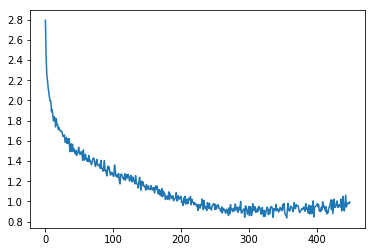

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
#print(plot_losses)
showPlot(plot_losses)

In [23]:
#evaluateRandomly(encoder_model, decoder_model, pairs[2000:], output_lang)
evaluateRandomlyAttn(encoder_model, decoder_attn_model, pairs[2000:], output_lang, max_length)

> rwc!u e4u5t w? x]5 rwc! 4u -w?’ 4u 4-- c5;5c5?75u xw scw%57x ’6x5?e5c’
= works based on the work as long as all references to project gutenberg
< wonder what was coming in a her first seemed to say .<EOS>

> tw5u ?wx 4’c55 xw x]5 x5c:u w; x]5 ;6-- scw%57x ’6x5?e5c’ 1 x:
= does not agree to the terms of the full project gutenberg - tm
< do you know , the used to say whet you manage to see the other side of what<EOS>

> efctu 4?t e54uxu $ 4u r5-- 4u x]5 r]w-5 s47! w; 74ctu p x]5 !?4/5 r4u
= birds and beasts , as well as the whole pack of cards : the knave was
< by the other side of what ? the duchess to have of the sea .<EOS>

> _?wx]f?’ r]4x5/5c k ” s5cufux5t x]5 !f?’ q
= ‘nothing whatever ? ’ persisted the king .
< ‘now ! ’ said the caterpillar .<EOS>

> %6ux e5’f??f?’ xw rcfx5 x]fu twr? w? x]5fc u-4x5u $ r]5? x]5 r]fx5 c4eefx
= just beginning to write this down on their slates , when the white rabbit
< just by the himber was in a long and looked at on the same to happen whether she 